Base de dados Kaggle: https://www.kaggle.com/laotse/credit-risk-dataset

Objetivo: 

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
def identify_outlier(df):
# Função destinada a identificar quais os outliers da coluna'
  q1 = df.quantile(0.25)
  q3 = df.quantile(0.75)
  IQR = q3 - q1
  outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
  if outliers.empty:
    print('Não há outliers na coluna selecionada')
  else:
    return outliers

In [ ]:
df = pd.read_csv('/content/credit_risk_dataset.csv')

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
linha, coluna = df.shape
df.shape

(32581, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
Nan_per = df.isnull().sum()/df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [ ]:
'''
Dicionário de Dados
0   person_age IDADE int64  
1   person_income RENDA int64  
2   person_home_ownership TIPO DE PROPRIEDADE DA CASA object
3   person_emp_length TEMPO DE TRABALHO float64
4   loan_intent MOTIVO DO EMPRÉSTIMO  object 
5   loan_grade GRAU DO EMPRÉSTIMO  object 
6   loan_amnt VALOR DO EMPRÉSTIMO int64  
7   loan_int_rate TAXA DE JUROS float64
8   loan_status STATUS DO EMPRÉSTIMO (0 is non default 1 is default) int64  
9   loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA float64
10  cb_person_default_on_file PADRÃO HISTÓRICO object 
11  cb_person_cred_hist_length SCORE DE CRÉDITO int64 
'''

'\nDicionário de Dados\n0   person_age IDADE int64  \n1   person_income RENDA int64  \n2   person_home_ownership TIPO DE PROPRIEDADE DA CASA object\n3   person_emp_length TEMPO DE TRABALHO float64\n4   loan_intent MOTIVO DO EMPRÉSTIMO  object \n5   loan_grade GRAU DO EMPRÉSTIMO  object \n6   loan_amnt VALOR DO EMPRÉSTIMO int64  \n7   loan_int_rate TAXA DE JUROS float64\n8   loan_status STATUS DO EMPRÉSTIMO int64  \n9   loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA float64\n10  cb_person_default_on_file PADRÃO HISTÓRICO object \n11  cb_person_cred_hist_length SCORE DE CRÉDITO int64 \n'

# Person_age


---

Excluídos 5 registros > 100


---

df -> df_v2



---

A idade média dos clientes é de 27.7 e a mediana é de 26.

In [ ]:
df.person_age.nunique()

58

In [ ]:
df.person_age.unique()

array([ 22,  21,  25,  23,  24,  26, 144, 123,  20,  32,  34,  29,  33,
        28,  35,  31,  27,  30,  36,  40,  50,  45,  37,  39,  44,  43,
        41,  46,  38,  47,  42,  48,  49,  58,  65,  51,  53,  66,  61,
        54,  57,  59,  62,  60,  55,  52,  64,  70,  78,  69,  56,  73,
        63,  94,  80,  84,  76,  67])

In [ ]:
df['person_age'].min()

20

In [ ]:
df[df['person_age'] > 100].shape # São 5 registros de clientes com idade acima de 100. Serão desconsiderados.

(5, 12)

In [ ]:
df[df['person_age'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.00,N,25


In [ ]:
df_v2 = df[df['person_age']<= 100]

In [ ]:
df_v2.shape

(32576, 12)

In [ ]:
df_v2['person_age'].describe()

count    32576.000000
mean        27.718044
std          6.204990
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64

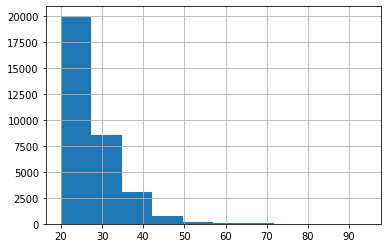

In [ ]:
df_v2['person_age'].hist()

# Person_income
Renda


---


Coluna apresenta outliers, mas, em regra, serão mantidos na base de dados. Afinal, não é uma premissa do modelo ser incapaz de avaliar clientes com alta renda.


---


Especialmente o ID 32297, que apresenta o valor máximo do atributo (R$ 6.000.000), será excluído devido à idade 144, não pela renda.


---

A renda média dos clientes é de 65,882.14 e a mediana 55,000

In [ ]:
df_v2['person_income'].nunique()

4294

In [ ]:
df_v2['person_income'].unique()

array([  59000,    9600,   65500, ...,  720000, 1900000,    4888])

In [ ]:
df_v2['person_income'].describe().round(2)

count      32576.00
mean       65882.14
std        52534.99
min         4000.00
25%        38500.00
50%        55000.00
75%        79200.00
max      2039784.00
Name: person_income, dtype: float64

In [ ]:
identify_outlier(df_v2['person_income'])

15        500000
20        162500
33        306000
34        300000
42        300000
          ...   
32544     780000
32546    1900000
32551     780000
32562     160000
32579     150000
Name: person_income, Length: 1481, dtype: int64

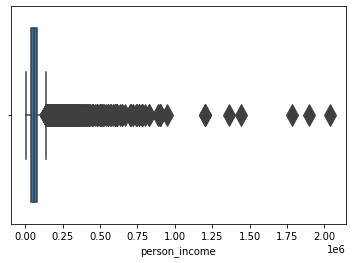

In [ ]:
sns.boxplot(x='person_income', data=df_v2, fliersize=15)

In [ ]:
df_v2.loc[df['person_income'] == df_v2['person_income'].max()]
#Registro já será desconsiderado devido à idade.

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
30049,42,2039784,RENT,0.0,VENTURE,C,8450,12.29,0,0.0,Y,15


#Person_home_ownership


---

A maioria dos clientes mora em casa alugada (50.47) ou financiada (41.26)

In [ ]:
df_v2['person_home_ownership'].nunique()

4

In [ ]:
df_v2['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [ ]:
df_v2_gb_ownership = df_v2.groupby('person_home_ownership')

In [ ]:
df_v2_gb_ownership.size().sort_values(ascending=False)

person_home_ownership
RENT        16443
MORTGAGE    13442
OWN          2584
OTHER         107
dtype: int64

In [ ]:
sum_df_v2_gb_ownership = df_v2_gb_ownership.size().sum()

In [ ]:
100 * 16443 / sum_df_v2_gb_ownership

50.47581041257367

In [ ]:
100 * 13442 / sum_df_v2_gb_ownership

41.2635068762279

#person_emp_length


---

Apresenta dados faltantes


---

Apresenta 2 registros de pessoas que supostamente tem tempo de serviço de 123 anos. Serão retiradas da base de dados.

---

df_v2 => df_v3

In [ ]:
df_v2['person_emp_length'].nunique()

36

In [ ]:
df_v2['person_emp_length'].unique()

array([123.,   5.,   1.,   4.,   8.,   2.,   6.,   7.,   0.,   9.,   3.,
        10.,  nan,  11.,  18.,  12.,  17.,  14.,  16.,  13.,  19.,  15.,
        20.,  22.,  21.,  24.,  23.,  26.,  25.,  27.,  28.,  31.,  41.,
        34.,  29.,  38.,  30.])

In [ ]:
df_v2['person_emp_length'].describe()

count    31681.000000
mean         4.789527
std          4.142706
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max        123.000000
Name: person_emp_length, dtype: float64

In [ ]:
df_v2['person_emp_length'].isnull().sum()

895

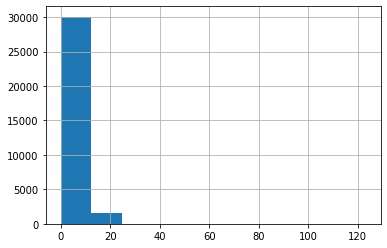

In [ ]:
df_v2['person_emp_length'].hist()

In [ ]:
df_v2.shape

(32576, 12)

In [ ]:
df_3teste = df_v2.loc[df_v2['person_emp_length'] >= 50]

In [ ]:
df_3teste.shape

(2, 12)

In [ ]:
df_v3_perda = df_v2.loc[df_v2['person_emp_length'] < 50]

In [ ]:
len(df_v3_perda)

31679

## Usando o df_v2, identifico que há 2 registros com tempo de trabalho acima de 50 anos, exatamente 123 anos de trabalho. Eles serão excluídos do dataset. Contudo, ao atribuir apenas os registros com tempo de serviço <= 50 anos, o dataset passa a ter -879 registros.
## Isso ocorre porque quando se filtra um campo por número, os na não são levados para o filtro.
## Utilizarei o drop para fazer a exclusão correta.

In [ ]:
df_v2.loc[df_v2['person_emp_length'] == 123]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [ ]:
df_v3 = df_v2.drop(index=[0,210])

In [ ]:
df_v3.shape

(32574, 12)

In [ ]:
df_v3['person_emp_length'].describe()

count    31679.000000
mean         4.782064
std          4.034948
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         41.000000
Name: person_emp_length, dtype: float64

## Tratando os NA da coluna


---

Considerando que os NA representam 2,75% da coluna (pouco representativo), será atribuída a estes registros a mediana do tempo de serviço dos demais registros.

In [ ]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

2.75

In [ ]:
df_v3['person_emp_length'].fillna(value=df_v3['person_emp_length'].median(), inplace=True)

In [ ]:
Nan_per = df_v3.isnull().sum()/df_v3.shape[0]*100
Nan_per['person_emp_length'].round(2)

0.0

#loan_intent MOTIVO DO EMPRÉSTIMO

In [ ]:
df_v3['loan_intent'].nunique()

6

In [ ]:
df_v3['loan_intent'].unique()

array(['EDUCATION', 'MEDICAL', 'VENTURE', 'PERSONAL', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [ ]:
df_v3_gb_intent = df_v3.groupby("loan_intent")[['person_age', 'loan_amnt']]

In [ ]:
df_v3_gb_intent.count().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
EDUCATION,6451,6451
MEDICAL,6071,6071
VENTURE,5716,5716
PERSONAL,5519,5519
DEBTCONSOLIDATION,5212,5212
HOMEIMPROVEMENT,3605,3605


In [ ]:
df_v3_gb_intent.sum().sort_values(by='loan_amnt', ascending=False)

,person_age,loan_amnt
loan_intent,,
EDUCATION,171306,61165325
MEDICAL,169976,56214925
VENTURE,157376,54764825
PERSONAL,155573,52816800
DEBTCONSOLIDATION,143884,50008550
HOMEIMPROVEMENT,104785,37349675


In [ ]:
(df_v3_gb_intent.sum() / df_v3_gb_intent.count()).sort_values(by='loan_amnt', ascending=False).round(2)

,person_age,loan_amnt
loan_intent,,
HOMEIMPROVEMENT,29.07,10360.52
DEBTCONSOLIDATION,27.61,9594.89
VENTURE,27.53,9580.97
PERSONAL,28.19,9569.99
EDUCATION,26.55,9481.53
MEDICAL,28.00,9259.58


#loan_grade GRAU DO EMPRÉSTIMO  object 

In [ ]:
df_v3.loan_grade.nunique()

7

In [ ]:
df_v3.loan_grade.unique()

array(['B', 'C', 'A', 'D', 'E', 'F', 'G'], dtype=object)

In [ ]:
df_v3_gb_grade = df_v3.groupby('loan_grade')[['person_age', 'loan_amnt']]

In [ ]:
df_v3_gb_grade.count()

,person_age,loan_amnt
loan_grade,,
A,10776,10776
B,10448,10448
C,6456,6456
D,3625,3625
E,964,964
F,241,241
G,64,64


#loan_amnt VALOR DO EMPRÉSTIMO

In [ ]:
df_v3.loan_amnt.nunique()

753

In [ ]:
df_v3.loan_amnt.describe()

count    32574.000000
mean      9588.018051
std       6320.249598
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64

# loan_int_rate TAXA DE JUROS 

In [ ]:
df_v3.loan_int_rate.nunique()

348

In [ ]:
df_v3.loan_int_rate.describe()

count    29459.000000
mean        11.011529
std          3.240497
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [ ]:
df_v3_gb_rate = df_v3.groupby(by=['loan_intent', 'loan_grade'])['loan_int_rate', 'loan_amnt']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
df_v3_gb_rate.sum().round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                11729.26   14977750
                  B                15968.56   16432775
                  C                12562.17    9534525
                  D                 8401.44    6430575
                  E                 2143.04    1810950
                  F                  687.18     630825
                  G                  162.66     191150
EDUCATION         A                14637.81   18472075
                  B                20110.33   20291900
                  C                16352.18   12064450
                  D                 9170.78    7152575
                  E                 2892.78    2361550
                  F                  736.14     659275
                  G                  180.70     163500
HOMEIMPROVEMENT   A                 7521.90   10006250
                  B                11099.33   12083900
                  C                 8439.99    6954600
                  D                 6840.14    5546300
                  E                 2240.72    2022725
                  F                  528.22     540025
                  G                  181.49     195875
MEDICAL           A                12890.07   16261675
                  B                19489.34   19005075
                  C                14936.50   10864875
                  D                 9247.46    6995175
                  E                 2630.07    2158625
                  F                  872.50     746500
                  G                  223.18     183000
PERSONAL          A                12142.50   15758325
                  B                18069.80   17683125
                  C                12740.07    9928275
                  D                 9101.18    6963750
                  E                 2344.03    1845400
                  F                  519.83     442575
                  G                  198.92     195350
VENTURE           A                12692.38   16531675
                  B                18543.77   18919625
                  C                13408.31   10146600
                  D                 8130.82    6215975
                  E                 2734.69    2251625
                  F                  638.49     527675
                  G                  247.89     171650

## Analisando os dados faltantes: Há predominância de dados faltantes em algum subgrupo do dataset?

---

person_home_ownership   
loan_intent   
loan_grade   
loan_status   
cb_person_default_on_file   
cb_person_cred_hist_length   

In [ ]:
df_v3['isnull_loan_int_rate'] = 0

In [ ]:
if df_v3['loan_int_rate']:
    df_v3['isnull_loan_int_rate'] = 1
else:
    df_v3['isnull_loan_int_rate'] = 0

NameError: ignored

In [ ]:
df_v3['isnull_loan_int_rate'].sum()

32574

In [ ]:
df_v3_gb_homeow = df_v3.groupby('person_home_ownership')

In [ ]:
df_v3_gb_homeow.isnull().sum()

AttributeError: ignored

In [ ]:
df_v3_gb_rate.mean().round(2)

loan_int_rate  loan_amnt
loan_intent       loan_grade                          
DEBTCONSOLIDATION A                    7.33    8544.07
                  B                   10.99   10143.69
                  C                   13.46    9150.22
                  D                   15.39   10717.62
                  E                   17.01   12576.04
                  F                   18.57   14670.35
                  G                   20.33   19115.00
EDUCATION         A                    7.37    8496.81
                  B                   11.00   10025.64
                  C                   13.43    8897.09
                  D                   15.31   10886.72
                  E                   17.02   12765.14
                  F                   18.40   14332.07
                  G                   20.08   18166.67
HOMEIMPROVEMENT   A                    7.26    8886.55
                  B                   10.99   10837.58
                  C                   13.44   10035.50
                  D                   15.27   11388.71
                  E                   17.24   14144.93
                  F                   18.21   16875.78
                  G                   20.17   21763.89
MEDICAL           A                    7.34    8301.01
                  B                   10.99    9474.12
                  C                   13.47    8927.59
                  D                   15.41   10630.97
                  E                   17.08   12925.90
                  F                   18.56   14355.77
                  G                   20.29   15250.00
PERSONAL          A                    7.33    8601.71
                  B                   11.00    9753.52
                  C                   13.48    9500.74
                  D                   15.37   10846.96
                  E                   16.99   12553.74
                  F                   19.25   14752.50
                  G                   19.89   19535.00
VENTURE           A                    7.31    8556.77
                  B                   11.01   10117.45
                  C                   13.50    9199.09
                  D                   15.40   10698.75
                  E                   16.78   12649.58
                  F                   18.78   13886.18
                  G                   20.66   12260.71

# loan_status STATUS DO EMPRÉSTIMO


---

(0 is non default 1 is default)

In [ ]:
df_v3.loan_status.nunique()

2

In [ ]:
df_v3.loan_status.unique()

array([0, 1])

In [ ]:
df_v3.loan_status.value_counts()

0    25467
1     7107
Name: loan_status, dtype: int64

# loan_percent_income PERCENTUAL DO EMPRÉSTIMO RELATIVO A RENDA

In [ ]:
df_v3.loan_percent_income.nunique()

77

In [ ]:
df_v3.loan_percent_income.describe().round(9)

count    32574.000000
mean         0.170202
std          0.106755
min          0.000000
25%          0.090000
50%          0.150000
75%          0.230000
max          0.830000
Name: loan_percent_income, dtype: float64

In [ ]:
df_test_percent = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [ ]:
df_test_percent_min = df_v3.loc[df_v3['loan_percent_income'] == 0.0,['loan_amnt', 'person_income', 'loan_percent_income']]

In [ ]:
df_test_percent_max = df_v3.loc[df_v3['loan_percent_income'] > 0.7,['loan_amnt', 'person_income', 'loan_percent_income']]

In [ ]:
df_test_percent_concat = pd.concat([df_test_percent_min, df_test_percent_max])

In [ ]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income
17834,2000,948000,0.00
18917,1800,510000,0.00
27877,2500,522000,0.00
30049,8450,2039784,0.00
31916,1000,780000,0.00
31922,6600,1362000,0.00
31924,6400,1440000,0.00
32546,1500,1900000,0.00
460,13000,18000,0.72
571,15000,19500,0.77


In [ ]:
df_test_percent_concat['test_column'] = (df_test_percent_concat['loan_amnt'] / df_test_percent_concat['person_income']).round(2)

In [ ]:
df_test_percent_concat

,loan_amnt,person_income,loan_percent_income,test_column
17834,2000,948000,0.00,0.00
18917,1800,510000,0.00,0.00
27877,2500,522000,0.00,0.00
30049,8450,2039784,0.00,0.00
31916,1000,780000,0.00,0.00
31922,6600,1362000,0.00,0.00
31924,6400,1440000,0.00,0.00
32546,1500,1900000,0.00,0.00
460,13000,18000,0.72,0.72
571,15000,19500,0.77,0.77


# cb_person_default_on_file PADRÃO HISTÓRICO

In [ ]:
df_v3['cb_person_default_on_file'].nunique()

2

In [ ]:
df_v3['cb_person_default_on_file'].unique()

array(['N', 'Y'], dtype=object)

In [ ]:
df_v3['cb_person_default_on_file'].value_counts()

N    26830
Y     5744
Name: cb_person_default_on_file, dtype: int64

# cb_person_cred_hist_length SCORE DE CRÉDITO

In [ ]:
df_v3['cb_person_cred_hist_length'].nunique()

29

In [ ]:
df_v3['cb_person_cred_hist_length'].unique()

array([ 2,  3,  4,  8,  7,  6,  9, 10,  5, 11, 16, 15, 12, 13, 17, 14, 28,
       27, 22, 19, 29, 23, 26, 20, 21, 30, 25, 24, 18])